# [1] Import Libary

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf

In [44]:
dataset = pd.read_csv('biased_leukemia_dataset.csv')

# [2] EDA

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143194 entries, 0 to 143193
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Patient_ID            143194 non-null  int64  
 1   Age                   143194 non-null  int64  
 2   Gender                143194 non-null  object 
 3   Country               143194 non-null  object 
 4   WBC_Count             143194 non-null  int64  
 5   RBC_Count             143194 non-null  float64
 6   Platelet_Count        143194 non-null  int64  
 7   Hemoglobin_Level      143194 non-null  float64
 8   Bone_Marrow_Blasts    143194 non-null  int64  
 9   Genetic_Mutation      143194 non-null  object 
 10  Family_History        143194 non-null  object 
 11  Smoking_Status        143194 non-null  object 
 12  Alcohol_Consumption   143194 non-null  object 
 13  Radiation_Exposure    143194 non-null  object 
 14  Infection_History     143194 non-null  object 
 15  

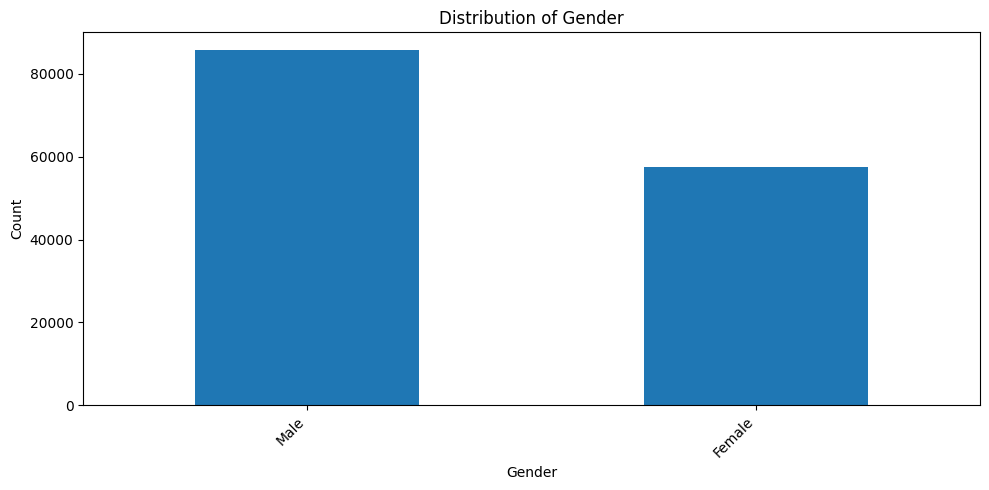

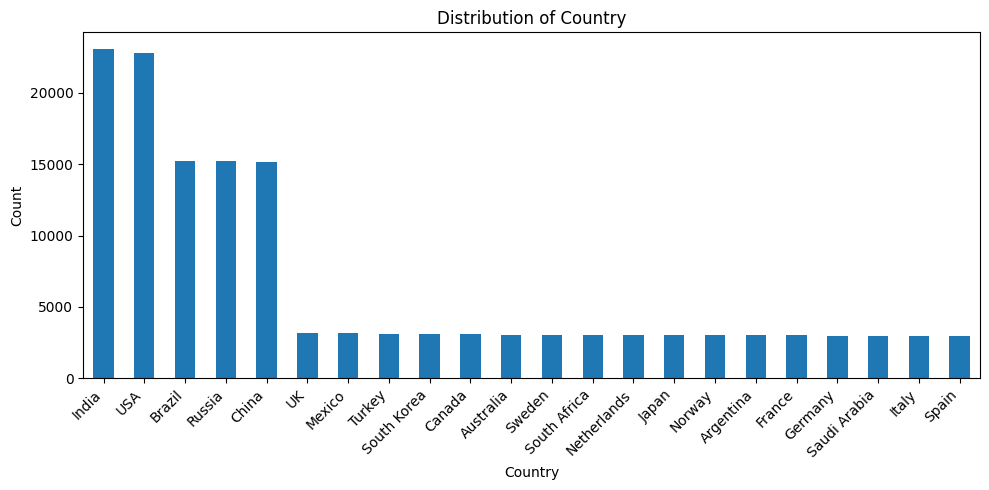

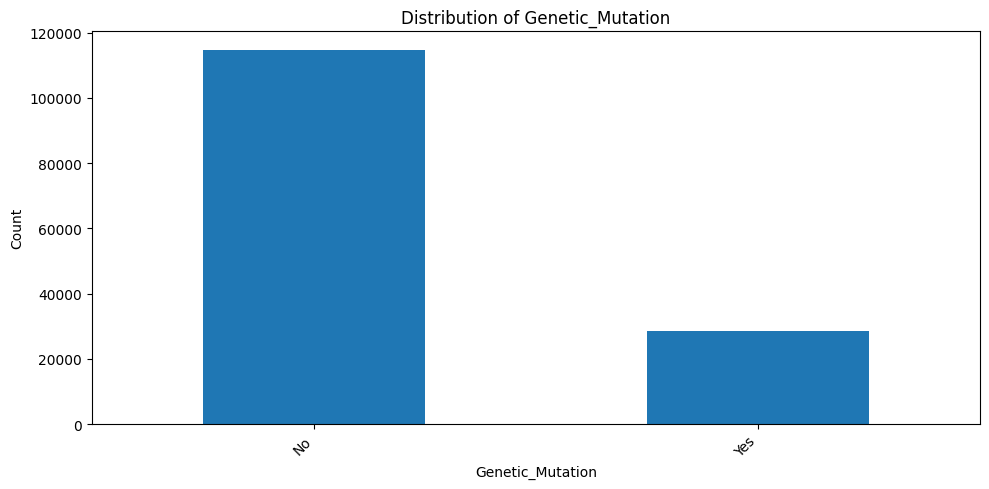

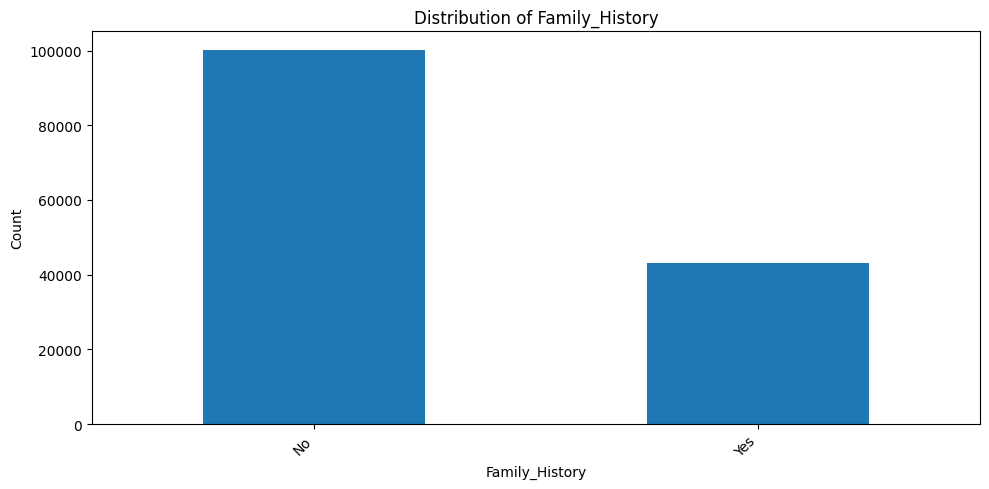

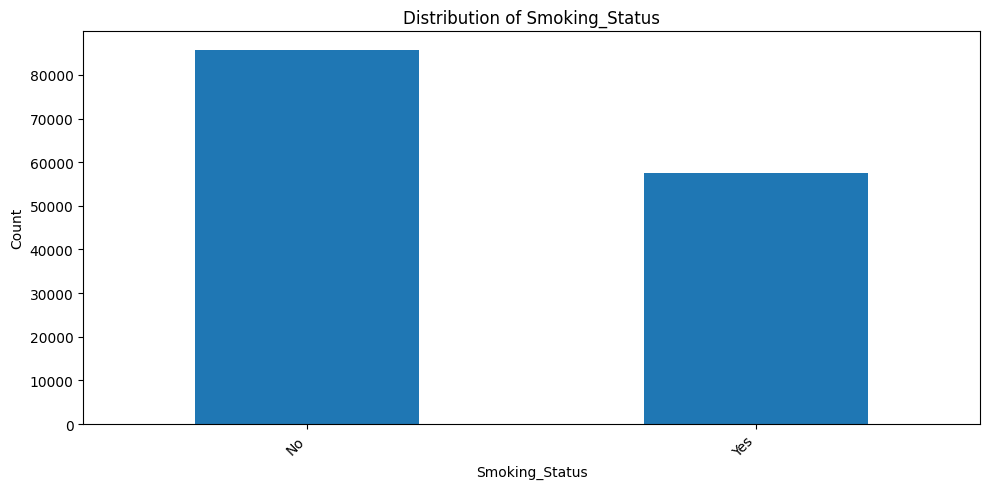

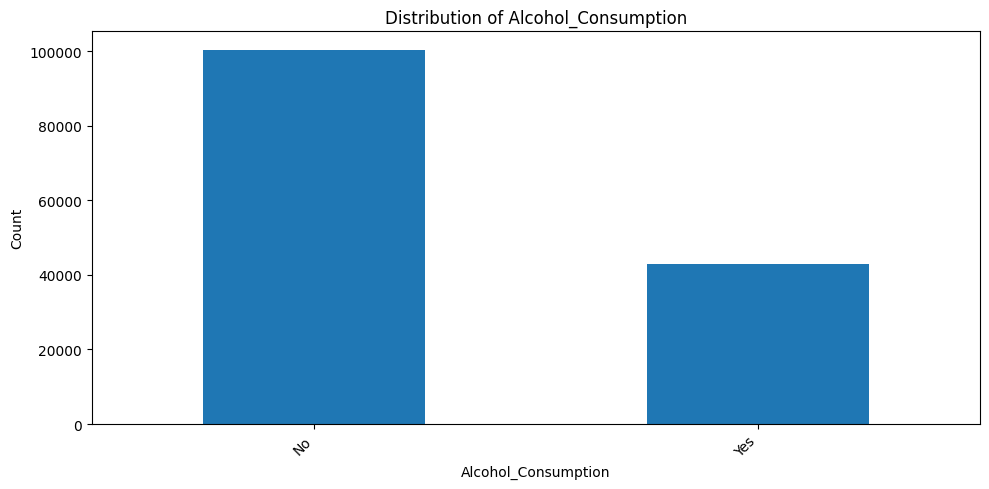

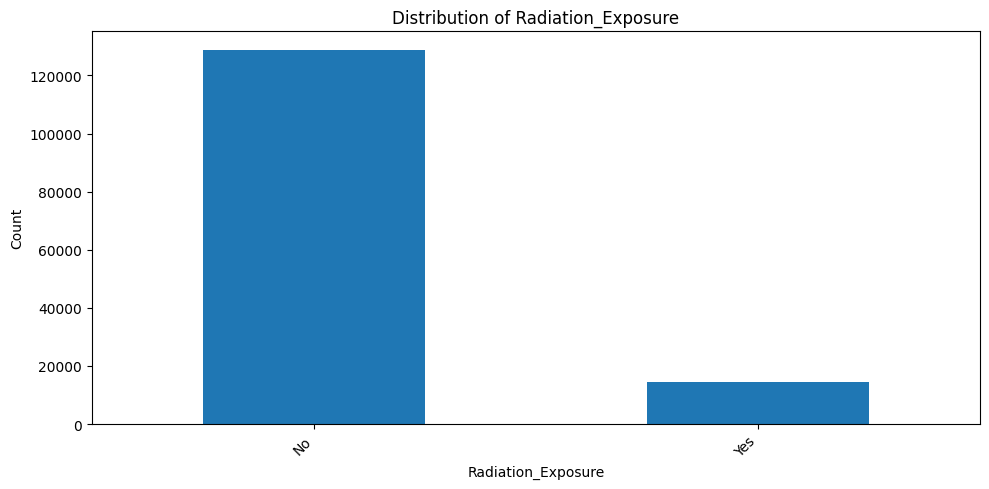

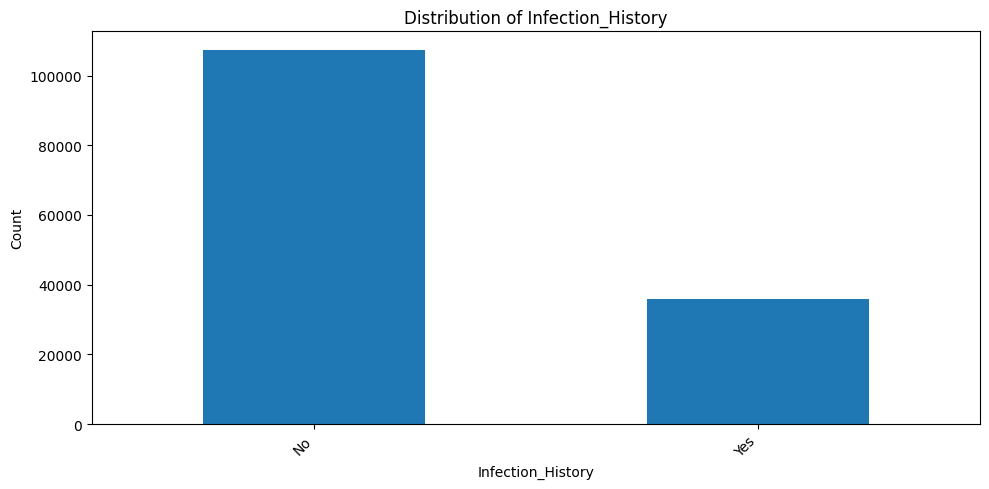

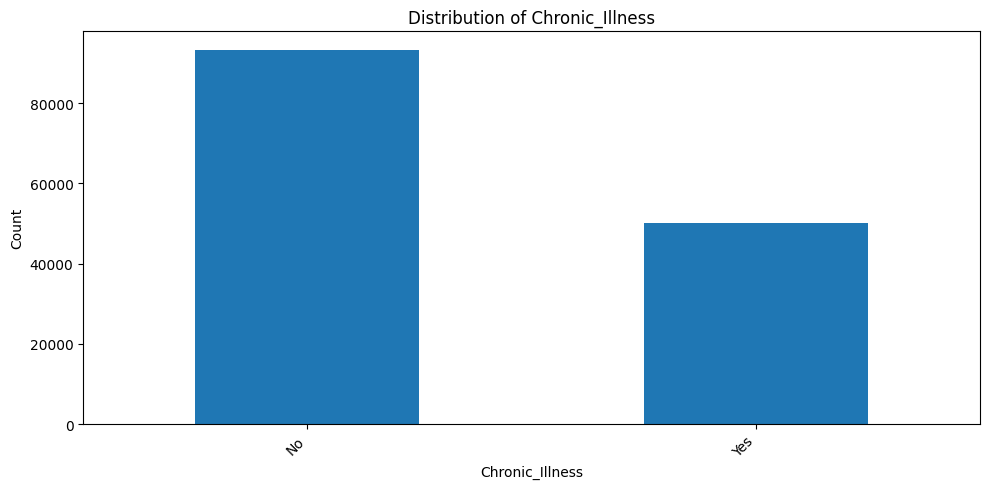

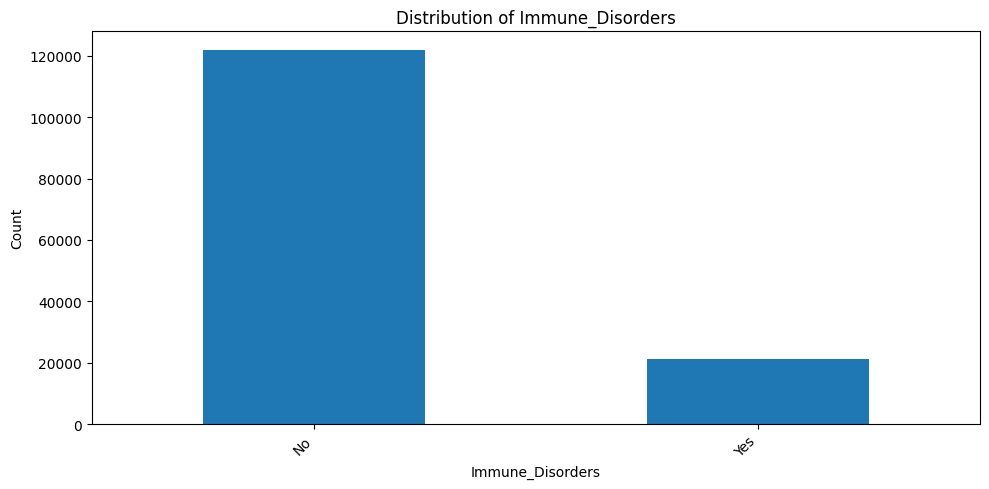

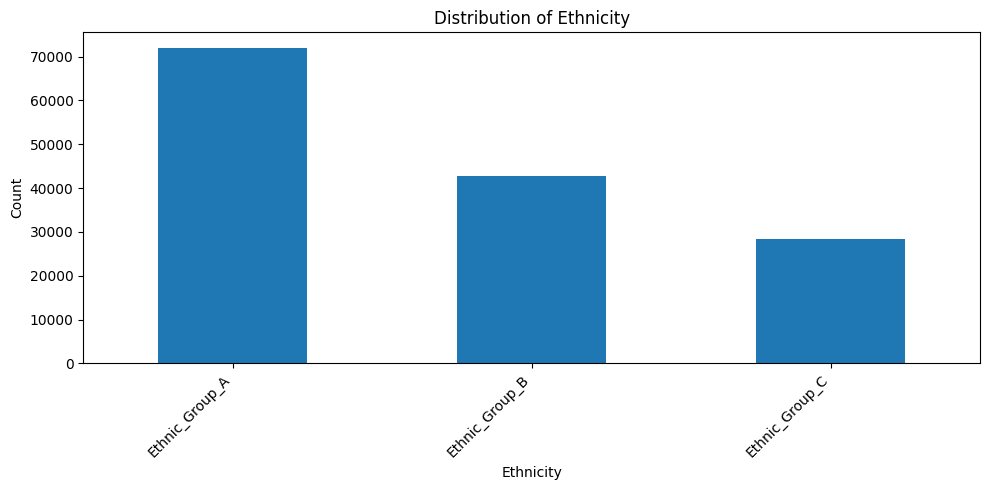

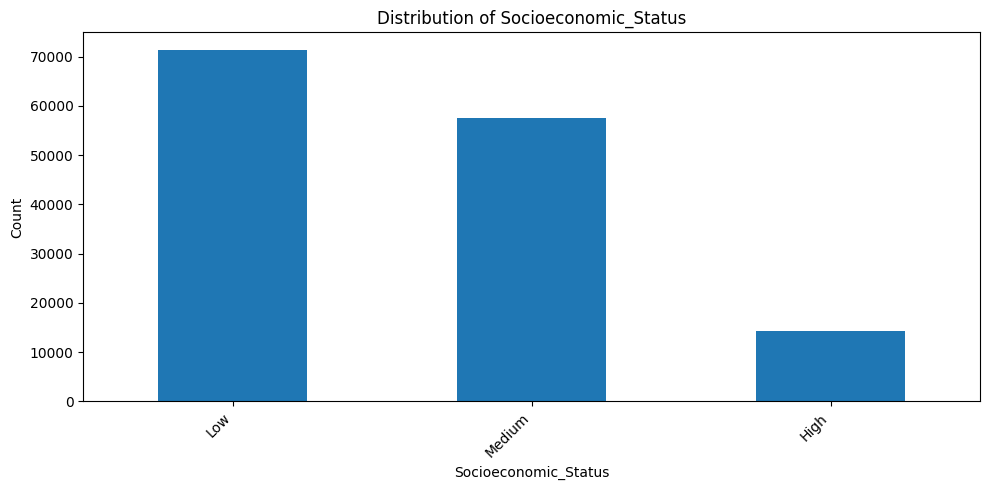

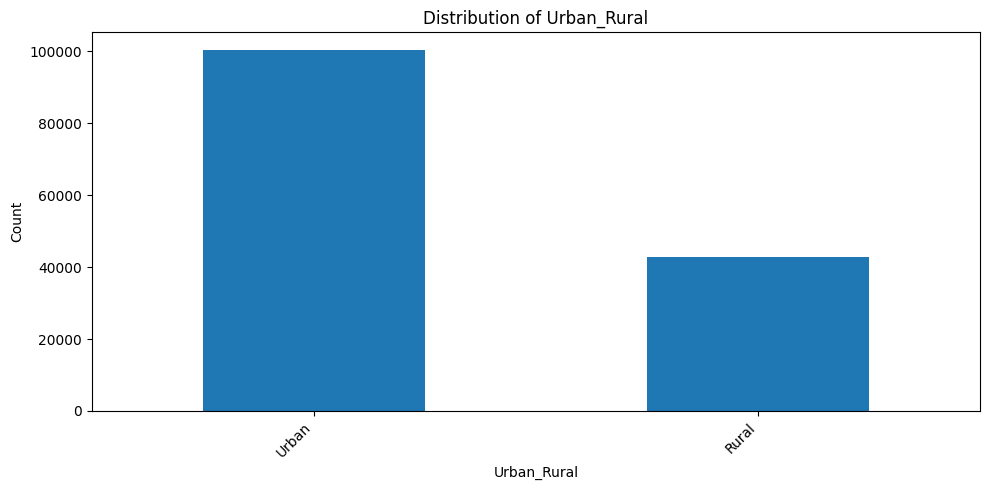

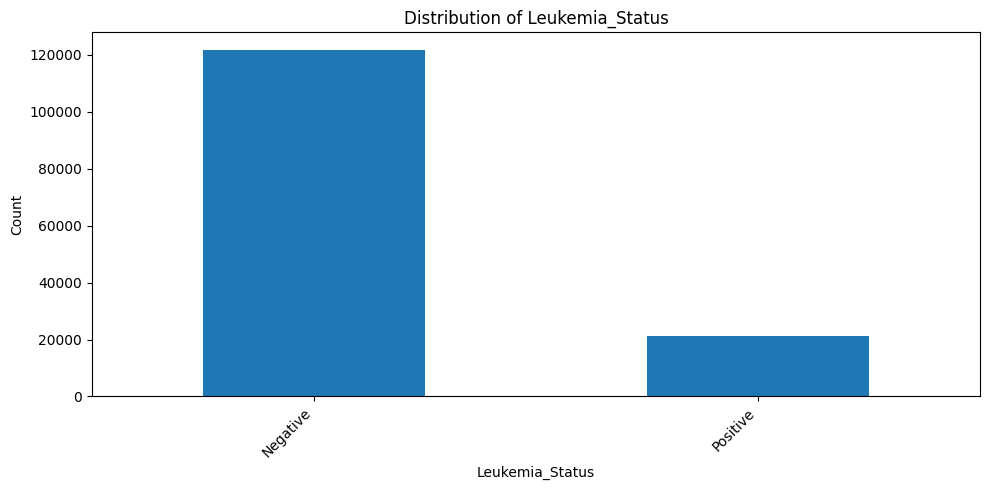

In [46]:
categorical_cols = [
    'Gender', 'Country', 'Genetic_Mutation', 'Family_History',
    'Smoking_Status', 'Alcohol_Consumption', 'Radiation_Exposure',
    'Infection_History', 'Chronic_Illness', 'Immune_Disorders',
    'Ethnicity', 'Socioeconomic_Status', 'Urban_Rural', 'Leukemia_Status'
]

# Plot
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    dataset[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

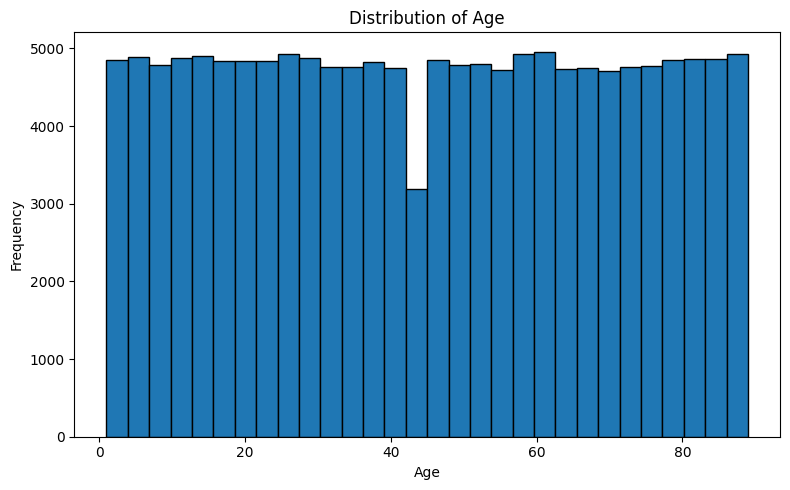

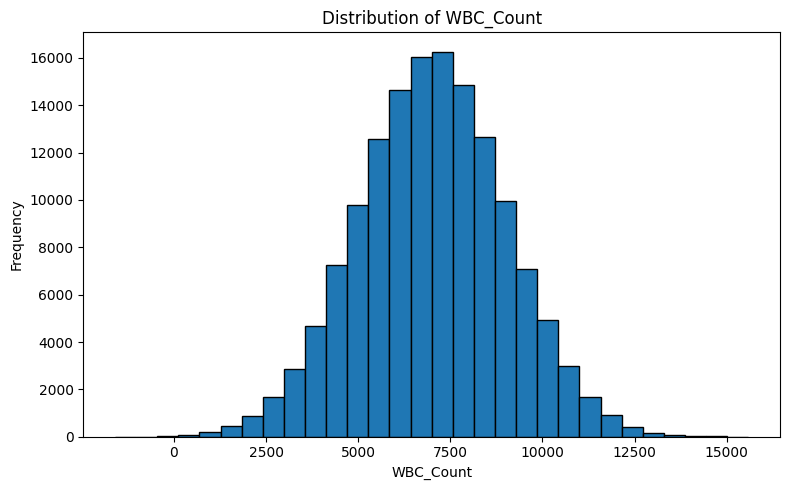

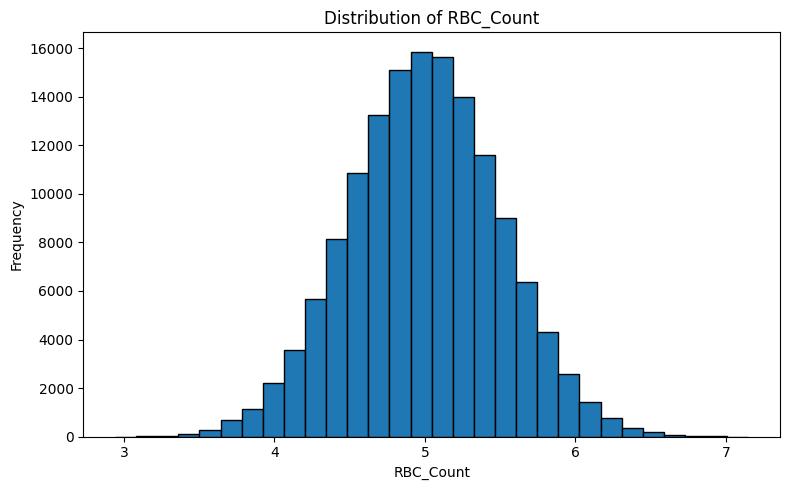

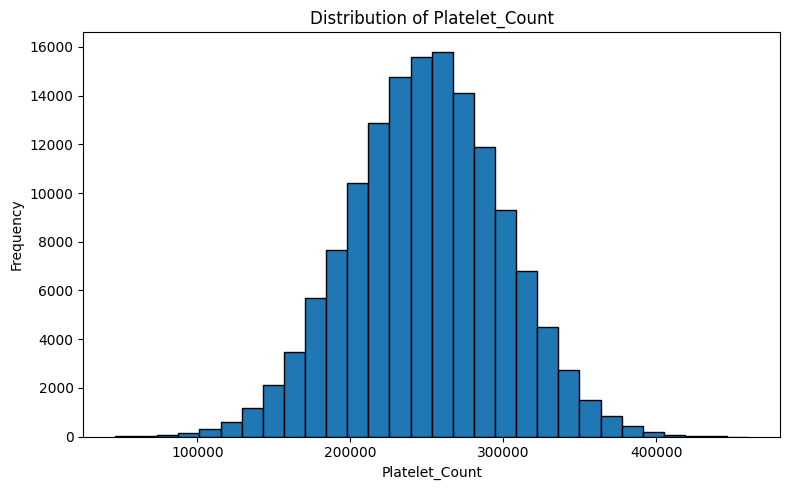

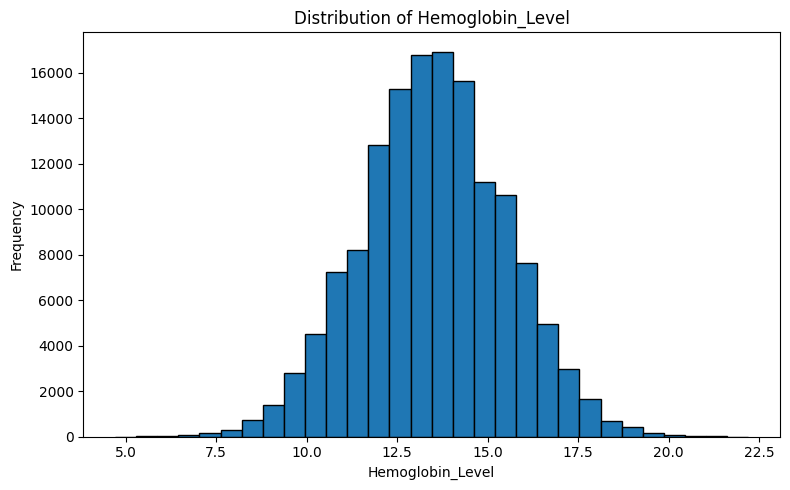

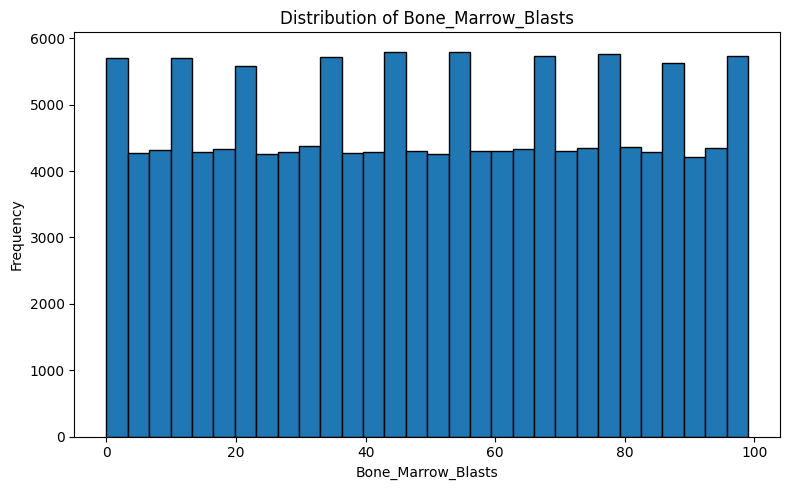

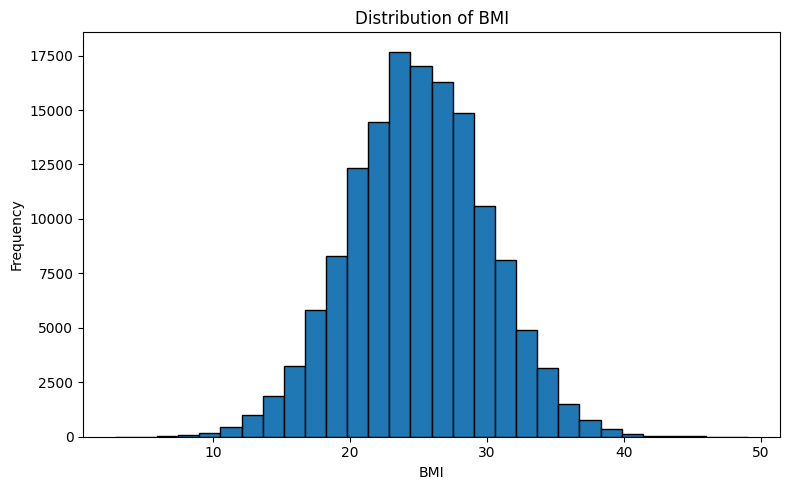

In [47]:
numeric_cols = ['Age', 'WBC_Count', 'RBC_Count', 'Platelet_Count', 'Hemoglobin_Level', 'Bone_Marrow_Blasts', 'BMI']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(dataset[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


# [3] Data Preprocessing

drop Patient ID

In [48]:
df = dataset.drop(['Patient_ID'], axis=1)

Check null data

In [49]:
print(df.isnull().sum())

Age                     0
Gender                  0
Country                 0
WBC_Count               0
RBC_Count               0
Platelet_Count          0
Hemoglobin_Level        0
Bone_Marrow_Blasts      0
Genetic_Mutation        0
Family_History          0
Smoking_Status          0
Alcohol_Consumption     0
Radiation_Exposure      0
Infection_History       0
BMI                     0
Chronic_Illness         0
Immune_Disorders        0
Ethnicity               0
Socioeconomic_Status    0
Urban_Rural             0
Leukemia_Status         0
dtype: int64


Encode Categorical Features with 0,1,2,,,, n-1

In [50]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Genetic_Mutation', 'Family_History', 'Smoking_Status', 
              'Alcohol_Consumption', 'Radiation_Exposure', 'Infection_History', 
              'Chronic_Illness', 'Immune_Disorders', 'Ethnicity', 'Socioeconomic_Status', 
              'Urban_Rural', 'Leukemia_Status']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# One-hot :)
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

In [51]:
df.shape

(143194, 41)

In [52]:
df.head()

,Age,Gender,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,Smoking_Status,...,Country_Norway,Country_Russia,Country_Saudi Arabia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sweden,Country_Turkey,Country_UK,Country_USA
0,52,1,2698,5.36,262493,12.2,72,1,0,1,...,False,False,False,False,False,False,False,False,False,False
1,15,0,4857,4.81,277877,11.9,97,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,72,1,9614,5.17,319600,13.4,94,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,61,1,6278,5.41,215200,11.6,50,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,21,1,8342,4.78,309169,14.3,28,0,0,1,...,False,False,False,False,False,False,False,False,False,False


Scale Numerical Features

In [53]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'WBC_Count', 'RBC_Count', 'Platelet_Count', 'Hemoglobin_Level', 
            'Bone_Marrow_Blasts', 'BMI']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [54]:
df.head()

,Age,Gender,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,Smoking_Status,...,Country_Norway,Country_Russia,Country_Saudi Arabia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sweden,Country_Turkey,Country_UK,Country_USA
0,0.274104,1,-2.143673,0.723185,0.251995,-0.650238,0.778570,1,0,1,...,False,False,False,False,False,False,False,False,False,False
1,-1.163475,0,-1.068173,-0.376164,0.560650,-0.800485,1.645497,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1.051173,1,1.301515,0.343410,1.397753,-0.049248,1.541465,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,0.623785,1,-0.360305,0.823125,-0.696860,-0.950732,0.015675,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,-0.930355,1,0.667871,-0.436129,1.188472,0.401494,-0.747221,0,0,1,...,False,False,False,False,False,False,False,False,False,False


train-test split

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop('Leukemia_Status', axis=1)
y = df['Leukemia_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Handling Class Imbalance using smote

In [56]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [57]:
# Ensure correct datatypes for TensorFlow
X_train_res = np.array(X_train_res).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train_res = np.array(y_train_res).astype(np.float32)  # for binary_crossentropy use float
y_test = np.array(y_test).astype(np.float32)



# [4] Modeling with SMOTE Data Set

ANN

In [58]:
# 1. Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Build Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# 3. Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train Model
history = model.fit(
    X_train_res, y_train_res,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# 5. Predict and Evaluate
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(f"{accuracy_score(y_test, y_pred):.4f}")


Epoch 1/50
6092/6092 [==============================] - 7s 1ms/step - loss: 0.5339 - accuracy: 0.7159 - val_loss: 0.5813 - val_accuracy: 0.7109
Epoch 2/50
6092/6092 [==============================] - 7s 1ms/step - loss: 0.5018 - accuracy: 0.7346 - val_loss: 0.6075 - val_accuracy: 0.6816
Epoch 3/50
6092/6092 [==============================] - 7s 1ms/step - loss: 0.4979 - accuracy: 0.7369 - val_loss: 0.5749 - val_accuracy: 0.7148
Epoch 4/50
6092/6092 [==============================] - 7s 1ms/step - loss: 0.4959 - accuracy: 0.7395 - val_loss: 0.5731 - val_accuracy: 0.7164
Epoch 5/50
6092/6092 [==============================] - 7s 1ms/step - loss: 0.4949 - accuracy: 0.7399 - val_loss: 0.5877 - val_accuracy: 0.7002
Epoch 6/50
6092/6092 [==============================] - 7s 1ms/step - loss: 0.4938 - accuracy: 0.7402 - val_loss: 0.5875 - val_accuracy: 0.7003
Epoch 7/50
6092/6092 [==============================] - 7s 1ms/step - loss: 0.4928 - accuracy: 0.7415 - val_loss: 0.5811 - val_accuracy:

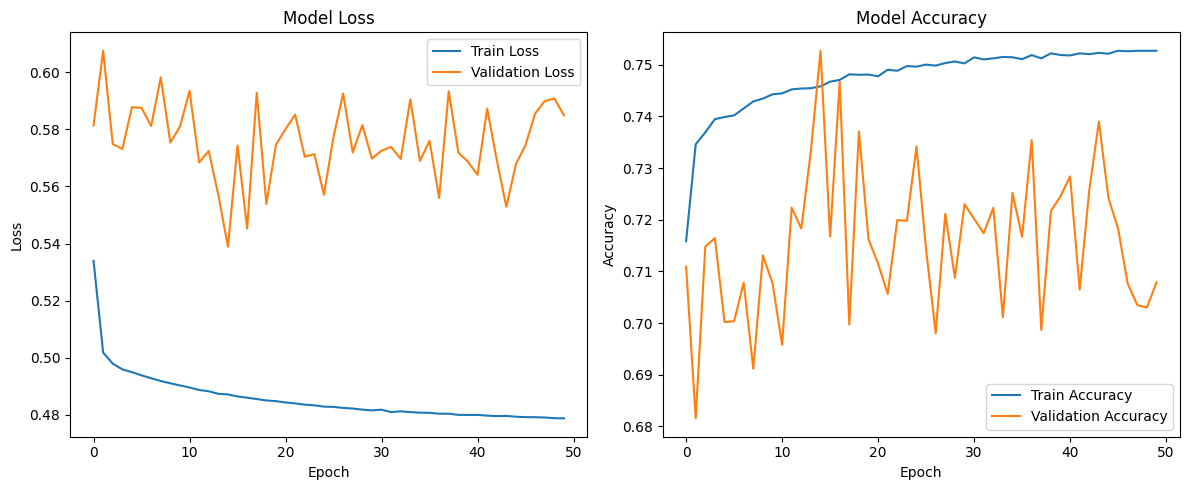

In [59]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


SVM (slow 140k+ rows)

In [ ]:
# # 1. Import libraries
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # 2. Create and Train SVM Model
# svm_model = SVC(kernel='rbf', random_state=42)  # <-- REMOVE class_weight now
# svm_model.fit(X_train_res, y_train_res)

# # 3. Predict and Evaluate
# y_pred = svm_model.predict(X_test)

# # Accuracy
# acc = accuracy_score(y_test, y_pred)
# print(f"✅ SVM Model Accuracy: {acc:.4f}")

# # Classification Report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Confusion Matrix
# conf_mat = confusion_matrix(y_test, y_pred)

# # 4. Plot Confusion Matrix
# plt.figure(figsize=(6,5))
# sns.heatmap(
#     conf_mat,
#     annot=True,
#     fmt='d',
#     cmap='Blues',
#     xticklabels=['Negative', 'Positive'],
#     yticklabels=['Negative', 'Positive']
# )
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix - SVM')
# plt.tight_layout()
# plt.show()


Random Forest

✅ Random Forest Model Accuracy: 0.7751

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87     24328
         1.0       0.14      0.10      0.12      4311

    accuracy                           0.78     28639
   macro avg       0.50      0.50      0.49     28639
weighted avg       0.74      0.78      0.76     28639



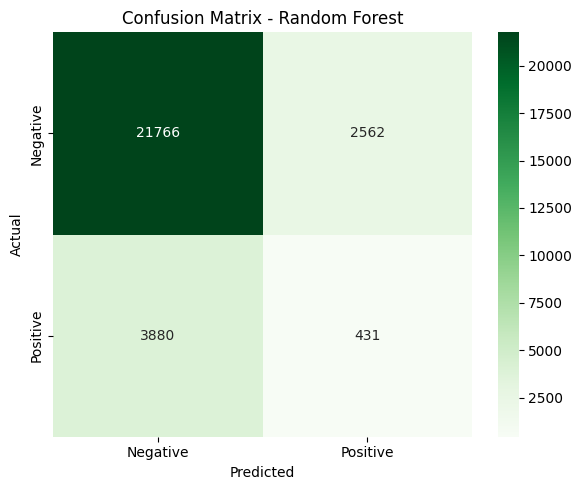

In [60]:
# 1. Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Create and Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    random_state=42,
    n_jobs=-1             # use all CPU cores
)
rf_model.fit(X_train_res, y_train_res)

# 3. Predict and Evaluate
y_pred = rf_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Random Forest Model Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# 4. Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['Negative', 'Positive'],
    yticklabels=['Negative', 'Positive']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()


TabNet

In [61]:
# 1. Import libraries
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Create and Train TabNet Model
clf = TabNetClassifier(
    verbose=1,
    seed=42
)

clf.fit(
    X_train_res, y_train_res,
    eval_set=[(X_test, y_test)],
    eval_name=['valid'],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128
)

# 3. Predict
y_pred = clf.predict(X_test)

# 4. Evaluate
print(f"✅ Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.67306 | valid_accuracy: 0.65201 |  0:00:25s
epoch 1  | loss: 0.53144 | valid_accuracy: 0.61186 |  0:00:53s
epoch 2  | loss: 0.51404 | valid_accuracy: 0.71916 |  0:01:21s
epoch 3  | loss: 0.51006 | valid_accuracy: 0.70044 |  0:01:49s
epoch 4  | loss: 0.5087  | valid_accuracy: 0.71204 |  0:02:18s
epoch 5  | loss: 0.5061  | valid_accuracy: 0.73473 |  0:02:47s
epoch 6  | loss: 0.50449 | valid_accuracy: 0.70414 |  0:03:16s
epoch 7  | loss: 0.50287 | valid_accuracy: 0.68794 |  0:03:48s
epoch 8  | loss: 0.50091 | valid_accuracy: 0.71696 |  0:04:18s
epoch 9  | loss: 0.50115 | valid_accuracy: 0.73316 |  0:04:48s
epoch 10 | loss: 0.49914 | valid_accuracy: 0.73103 |  0:05:13s
epoch 11 | loss: 0.50007 | valid_accuracy: 0.68962 |  0:05:35s
epoch 12 | loss: 0.49773 | valid_accuracy: 0.68679 |  0:06:03s
epoch 13 | loss: 0.49847 | valid_accuracy: 0.71162 |  0:06:34s
epoch 14 | loss: 0.4967  | valid_accuracy: 0.68882 |  0:07:08s
epoch 15 | loss: 0.49651 | valid_accuracy: 0.6988  |  0

c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Test Accuracy: 0.7347

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84     24328
         1.0       0.15      0.16      0.16      4311

    accuracy                           0.73     28639
   macro avg       0.50      0.50      0.50     28639
weighted avg       0.74      0.73      0.74     28639


Confusion Matrix:
[[20334  3994]
 [ 3603   708]]


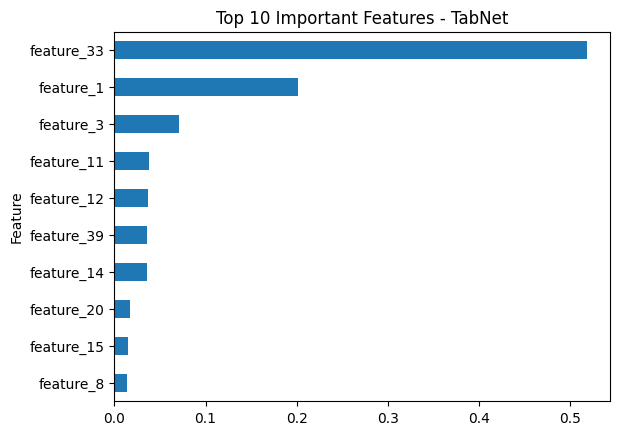

In [63]:
import pandas as pd

feat_importances = clf.feature_importances_
feature_names = [f'feature_{i}' for i in range(X_train_res.shape[1])]  # or use real column names if available

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feat_importances
}).sort_values('Importance', ascending=False)
# Plot
feat_imp_df.head(10).plot.barh(x='Feature', y='Importance', legend=False)
plt.title('Top 10 Important Features - TabNet')
plt.gca().invert_yaxis()
plt.show()
